In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/carlo/workspace/networkqit/')
import networkqit as nq
import numpy as np
import matplotlib.pyplot as plt
import bct

(0.26021161417322836, 128, 2115) thresh= 0.5


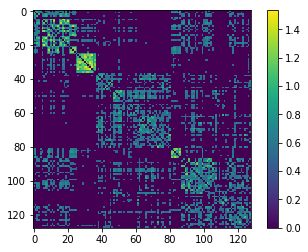

In [225]:
W=np.loadtxt('/home/carlo/workspace/communityalg/data/GroupAverage_rsfMRI_unthr.adj')
t=0.5
Wt = bct.threshold_absolute(W,t)[0:128,0:128]
t=Wt[np.nonzero(Wt)].min()
plt.imshow(Wt)
plt.colorbar()
print(bct.density_und(Wt),'thresh=',t)

(1.0, 512, 130816) thresh= 8.696906231184304e-05


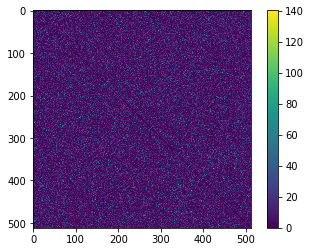

In [218]:
beta=10
size=[512,512]
W=np.random.exponential(beta,size=size)
W=np.triu(W,1)
W=W + W.T
t=0
Wt=bct.threshold_absolute(W,t)
Wt = np.triu(Wt,1)
Wt += Wt.T
t=Wt[np.nonzero(Wt)].min()
plt.imshow(Wt)
plt.colorbar()
print(bct.density_und(Wt),'thresh=',t)

In [226]:
M=nq.CWTECM2(N=len(Wt),threshold=Wt[np.nonzero(Wt)].min())
sol = M.fit(G=Wt, method='MLE')
L_mle = M.loglikelihood(G=Wt,theta=sol['x'])

In [96]:
sol = M.fit(G=Wt,method='saddle_point',x0=sol['x'],verbose=2,maxiter=100)
L_saddle = M.loglikelihood(G=Wt, theta=sol['x'])
print(L_mle,L_saddle)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5877e-04                                    1.89e+00    
       1              2         1.0566e-09      2.59e-04       2.38e-03       1.19e-02    
       2              3         1.4972e-20      1.06e-09       3.23e-06       2.85e-08    
`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 2.5877e-04, final cost 1.4972e-20, first-order optimality 2.85e-08.
-33424.11300457231 -33424.1129911882


In [230]:
M.expected_weighted_adjacency(sol['x'])+t

array([[0.59067095, 0.64936115, 0.65115277, ..., 0.64132803, 0.63613988,
        0.58787691],
       [0.64936115, 0.73432551, 0.73744415, ..., 0.72236077, 0.71509036,
        0.64471885],
       [0.65115277, 0.73744415, 0.74071719, ..., 0.72515513, 0.71776784,
        0.64637823],
       ...,
       [0.64132803, 0.72236077, 0.72515513, ..., 0.71115416, 0.7042035 ,
        0.63703207],
       [0.63613988, 0.71509036, 0.71776784, ..., 0.7042035 , 0.69741283,
        0.6320051 ],
       [0.58787691, 0.64471885, 0.64637823, ..., 0.63703207, 0.6320051 ,
        0.58521651]])

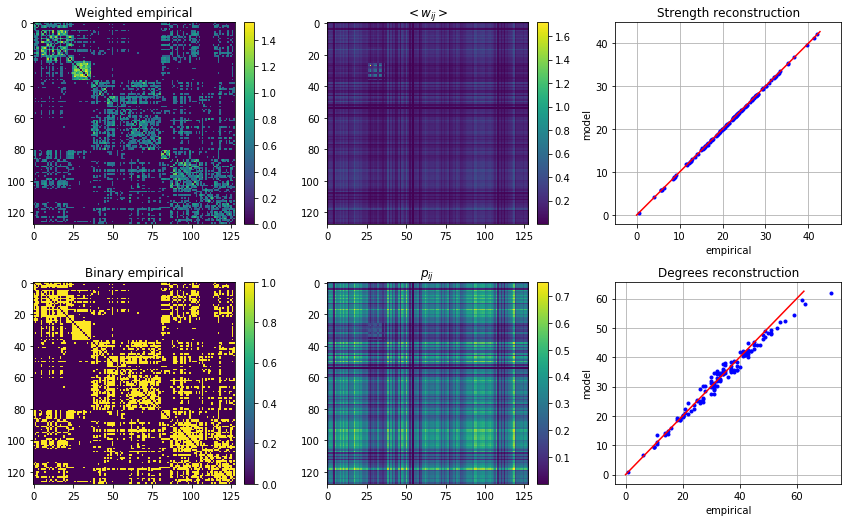

In [227]:
nq.plot_mle(Wt,M.expected_adjacency(sol['x'])/t, M.expected_weighted_adjacency(sol['x']))
plt.show()

In [233]:
X = M.sample_adjacency(sol['x'],batch_size=200)
print('Sample statistics:\tmin=%f\tmax=%f\tmean=%f\tstd=%f' % (X[np.nonzero(X)].min(),X[np.nonzero(X)].max(),X[np.nonzero(X)].mean(),X[np.nonzero(X)].std()))
print('Data statistics:\tmin=%f\tmax=%f\tmean=%f\tstd=%f' % (Wt[np.nonzero(Wt)].min(),Wt[np.nonzero(Wt)].max(),Wt[np.nonzero(Wt)].mean(),Wt[np.nonzero(Wt)].std()))
print('Average diff=%f thresh=%f' % (X[np.nonzero(X)].mean()-Wt[np.nonzero(Wt)].mean(),t))

Sample statistics:	min=0.500000	max=21.564773	mean=1.166265	std=0.683054
Data statistics:	min=0.500000	max=1.534000	mean=0.656352	std=0.166278
Average diff=0.509912 thresh=0.500000


In [223]:
np.mean(np.mean(M.sample_adjacency(sol['x'],batch_size=100),0) - Wt.mean(0))

-0.0016443479731473604

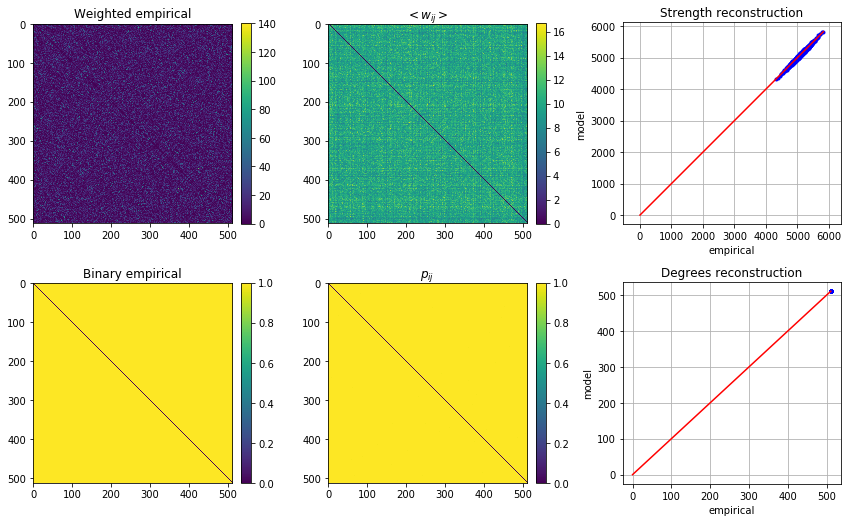

In [224]:
nq.plot_mle(Wt, np.mean(M.sample_adjacency(sol['x'],batch_size=100)>0,0),
                np.mean(M.sample_adjacency(sol['x'],batch_size=100),0))

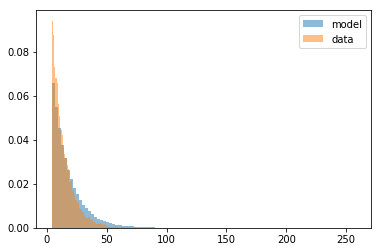

In [209]:
X=M.sample_adjacency(sol['x'],batch_size=100)
_ = plt.hist(X[np.nonzero(X)],label='model',density=True,bins=100,alpha=0.5)
_ = plt.hist(Wt[np.nonzero(Wt)],label='data',density=True,bins=100,alpha=0.5)
plt.legend()

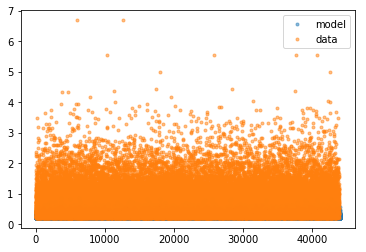

In [148]:
plt.plot(X[np.nonzero(X)],'.',alpha=0.5,label='model')
plt.plot(Wt[np.nonzero(Wt)],'.',alpha=0.5,label='data')
plt.legend()

In [149]:
np.mean(X[np.nonzero(X)][0:2000]/Wt[np.nonzero(Wt)][0:2000])

0.5420714281284034

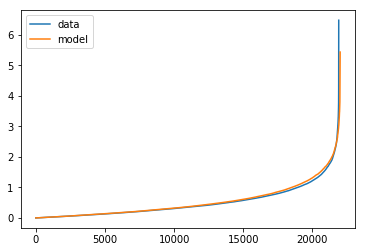

In [163]:
plt.plot(np.unique(Wt[np.nonzero(Wt)])-t,label='data')
plt.plot(((np.unique(X[np.nonzero(X)]))-t)*8.5,label='model')
plt.legend()

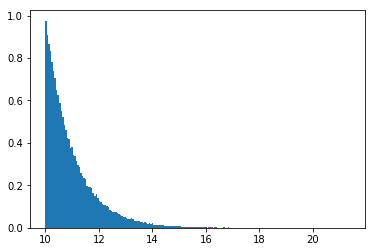

In [140]:
Y=nq.matrices.trunc_exp_rv(low=10,scale=1,size=[100000,])
_=plt.hist(Y,density=True,bins=200)

In [44]:
A=np.loadtxt('/home/carlo/workspace/communityalg/data/karate.adj')
nq.incidence_matrix(A)

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [45]:
import networkx as nx
nx.incidence_matrix(G=nx.from_numpy_array(A)).toarray()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [60]:
np.linalg.eigvals(nq.reduced_nonbacktracking_matrix(A))

ValueError: all the input array dimensions except for the concatenation axis must match exactly